<a href="https://colab.research.google.com/github/Hassan-zeidan/AAI614_Zeidan/blob/main/Week%206/Assignment%201/Kmean_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
url = "https://raw.githubusercontent.com/Hassan-zeidan/AAI614_Zeidan/main/Week%206/Assignment%201/Mall_Customers.csv"
df = pd.read_csv(url)

In [10]:
print(df.head(),"\n"*4)
print(df.info(),"\n"*4)
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None 




       CustomerID         Age  Annual Inc

In [14]:
# Choose Annual Income (k$) , Spending Score (1-100) to apply clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
k = 5
kmeans = KMeans(n_clusters=k, n_init=10 , random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [19]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

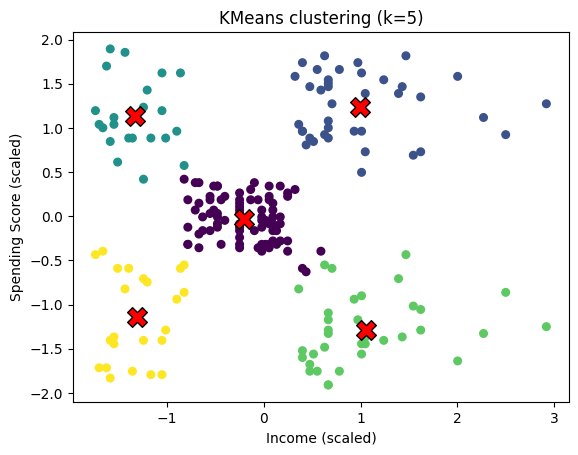

In [20]:
# Visualize
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap="viridis", s=30)
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c='red', edgecolors='k')
plt.xlabel("Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title(f"KMeans clustering (k={k})")
plt.show()

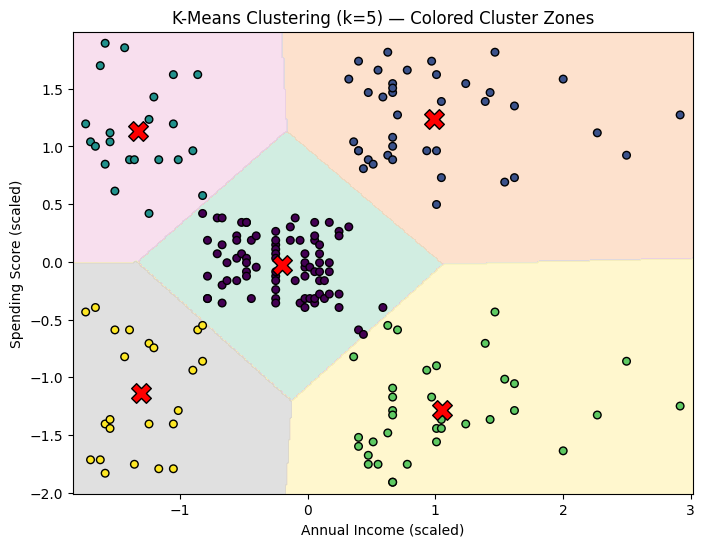

In [21]:
x_min, x_max = X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1
y_min, y_max = X_scaled[:, 1].min() - 0.1, X_scaled[:, 1].max() + 0.1

# Create a grid of points
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))

# Predict cluster for each grid point
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot filled color regions (each cluster zone)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap='Pastel2', alpha=0.6)

# Plot the real data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=30, edgecolors='k')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', edgecolors='black')

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title(f"K-Means Clustering (k={k}) — Colored Cluster Zones")
plt.show()

There are five main customer segments based on income and spending.

The boundaries show natural divisions in behavior customers near the same centroid behave similarly.

Businesses can:

Focus promotions on “high spending, high income” clients (top right).

Offer discounts to “low income, high spending” clients to retain them.

Try to convert “high income, low spending” customers into bigger spenders.